# DATASET-INFORMATION

DEPENDING ON VARIOUS FACTORS HAPPINESS SCORE IS GIVEN OF DIFFERNT COUNTRIES WE NEED TO MAKE A EDA FOR THE SAME

In [1]:
#importing needed liabraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import scipy
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the dataset into df & printing its first five rows & columns 

df=pd.read_csv('world_happiness_report.csv')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
#printing the last 5 rows of the dataset

df.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [4]:
#printing any row from the dataset by using sample

df.sample()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
121,Ethiopia,Sub-Saharan Africa,122,4.512,0.0378,0.19073,0.60406,0.44055,0.4345,0.15048,0.24325,2.44876


In [5]:
#checking the cloumn names with the function .keys()

df.keys()

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [6]:
#cheching the types of the all the varibale found that country & reigon are only having variable as object else all are of
#float 64 data type

df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [7]:
#checking is there any null values present in the column as u can see in the output all are 0 stats that there are no null 
#values are present

df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

<AxesSubplot:>

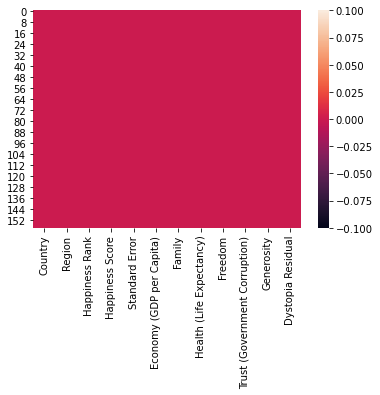

In [8]:
#for better confirmation checking with heatmap also

sns.heatmap(df.isnull())

In [9]:
#checking skewness standar error ,family ,health ,Trust ,Generosity are above the range of -0.5 to 0.5 
#we will remove the skewness from these 4 coloumns

df.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [10]:
#getting the information of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

# STATISCAL SUMMARY

In [11]:
#getting the overall statistical summary of the dataset
#1.In the cloumn Dystopia Residual,family,health & trust you can see the std is very low from the mean that stats the there is a skewness.
#2.There are no outliers as we cant see the huge gap b/w 75% & max row in every column
#3.The mean is low from the median in every column
#4.High std in Happiness rank column stats the data is too much spreaded & also the range is high

df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


# DATA VISUALIZATION

# UNIVARIET ANALYSIS

82     2
1      1
110    1
103    1
104    1
      ..
54     1
55     1
56     1
57     1
158    1
Name: Happiness Rank, Length: 157, dtype: int64


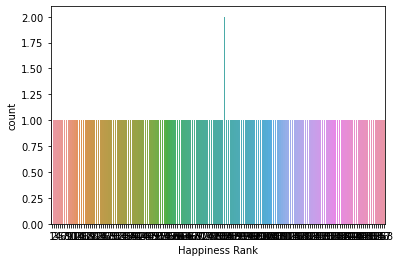

In [12]:
#using countplot getting analysis of how many times a rank is occured here we can see 82 has occured 2 times.

sns.countplot(x='Happiness Rank',data=df)
print(df['Happiness Rank'].value_counts())

<AxesSubplot:xlabel='Happiness Rank', ylabel='Density'>

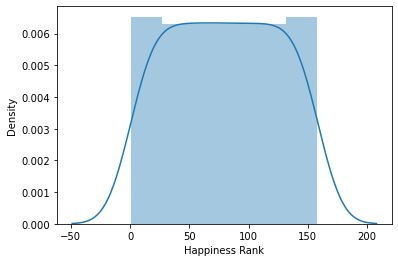

In [13]:
#through distribution plot we can see that the curve is properly shaped as a bell or not 
#bell shaped curve is considered as the sign of normal distributed curve

sns.distplot(df['Happiness Rank'])

<AxesSubplot:xlabel='Happiness Rank'>

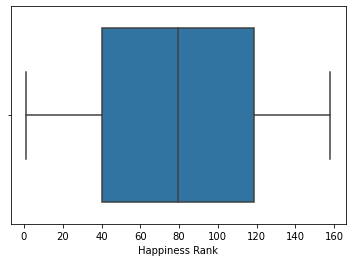

In [14]:
#boxplot is the best for determining outliers

sns.boxplot(df['Happiness Rank'])

<AxesSubplot:xlabel='Happiness Rank'>

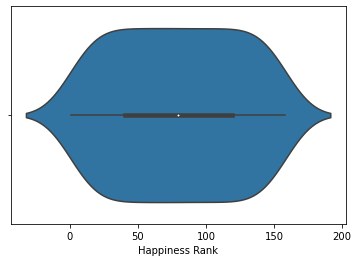

In [15]:
#there are so many numbers of plots for data visualization

sns.violinplot(df['Happiness Rank'])

<AxesSubplot:xlabel='Happiness Rank', ylabel='Count'>

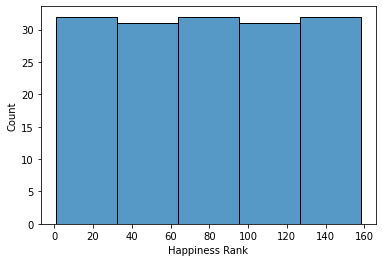

In [16]:
#histplot alows you to see bar type representation of the column

sns.histplot(df['Happiness Rank'],bins=5)

# BI-VARIET ANALYSIS

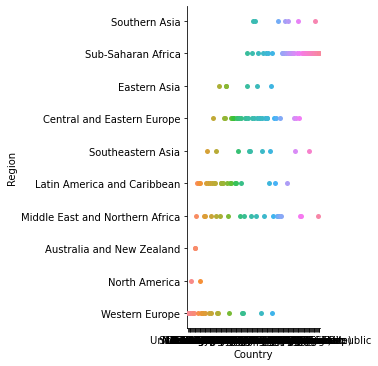

In [17]:
#catplot

sns.catplot(x='Country',y='Region',data=df)

<AxesSubplot:xlabel='Country', ylabel='Region'>

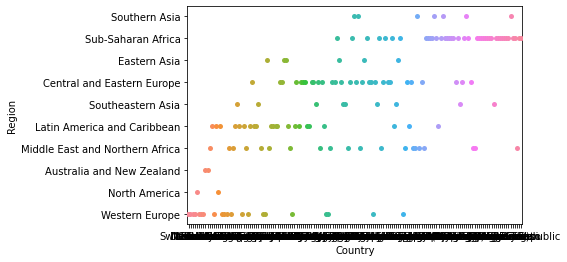

In [18]:
#stripplot 

sns.stripplot(x='Country',y='Region',data=df)

<AxesSubplot:xlabel='Happiness Rank', ylabel='Family'>

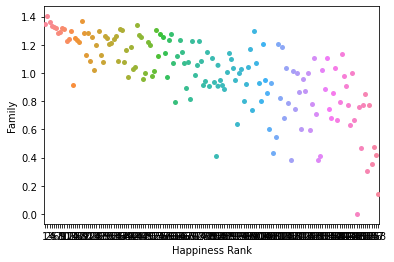

In [19]:
#swamplot

sns.swarmplot(x='Happiness Rank',y='Family',data=df)

<AxesSubplot:xlabel='Country', ylabel='Family'>

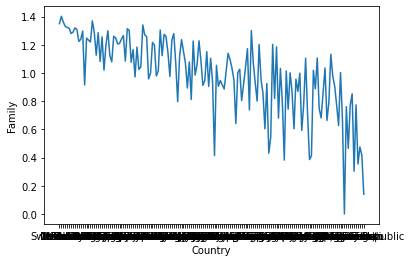

In [20]:
#lineplot shows different combinations for the 2 columns

sns.lineplot(x='Country',y='Family',data=df)

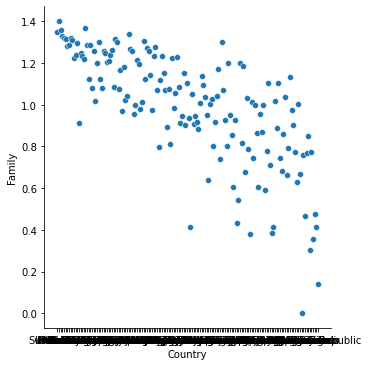

In [21]:
#relational plot helps us to determine different relations b/w the columns 
#here it is showing negative relation b/w country & family column

sns.relplot(x='Country',y='Family',data=df)

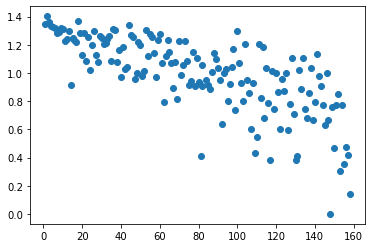

In [22]:
#scatter plot allows you to determining the relations b/w the two columns
#here shown the relationship b/w Happiness Rank & Family 
#it is showing negative relationship

plt.scatter(df['Happiness Rank'],df['Family'])
plt.show()

<AxesSubplot:xlabel='Happiness Rank', ylabel='Family'>

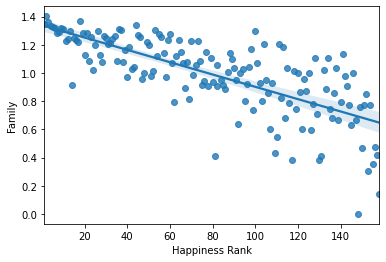

In [23]:
# regression plot helps us to determine the over & under ftting of the data

sns.regplot('Happiness Rank','Family',data=df)

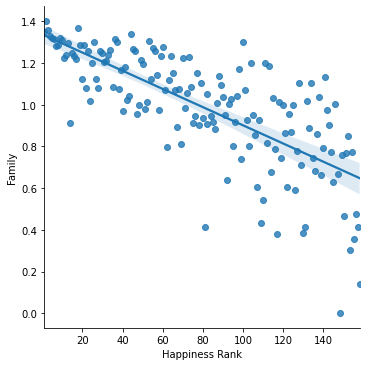

In [24]:
#lmplot tries its best possible way to connect all the points it also shows the best fit line

sns.lmplot('Happiness Rank','Family',data=df)

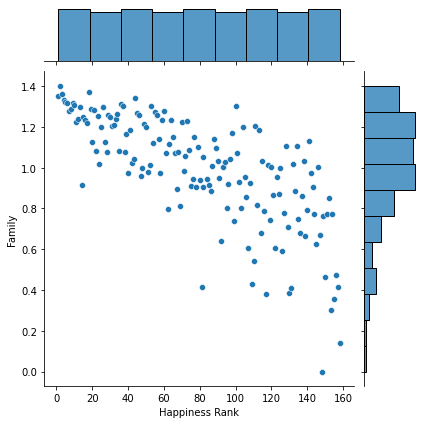

In [25]:
#jointplot allows us to pass 2 parameters as columns & shows their relationship simantaneously

sns.jointplot(data=df,x='Happiness Rank',y='Family')

<AxesSubplot:xlabel='Happiness Rank', ylabel='Family'>

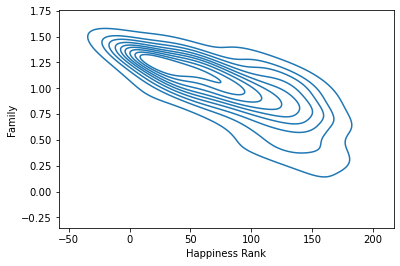

In [26]:
#kde plot only shows the line you can determine differnt ANALYSIS from kde plot 
# as family is decreasing Happiness Rank is increasing that shows negative relationship

sns.kdeplot(data=df,x='Happiness Rank',y='Family')

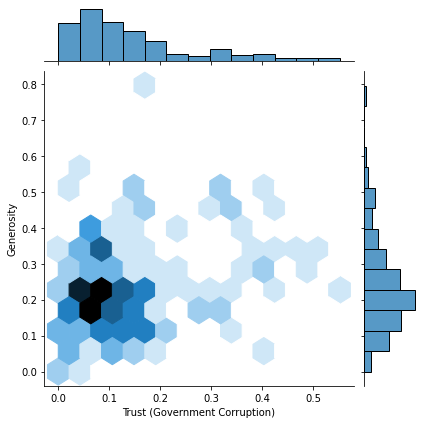

In [27]:
# you can also represnt your data in hexagonic style
# here we can see the relationship lesser the corruption lesser the generosity

sns.jointplot(data=df,x='Trust (Government Corruption)',y='Generosity',kind='hex')

# MULTIVARIET ANALYSIS

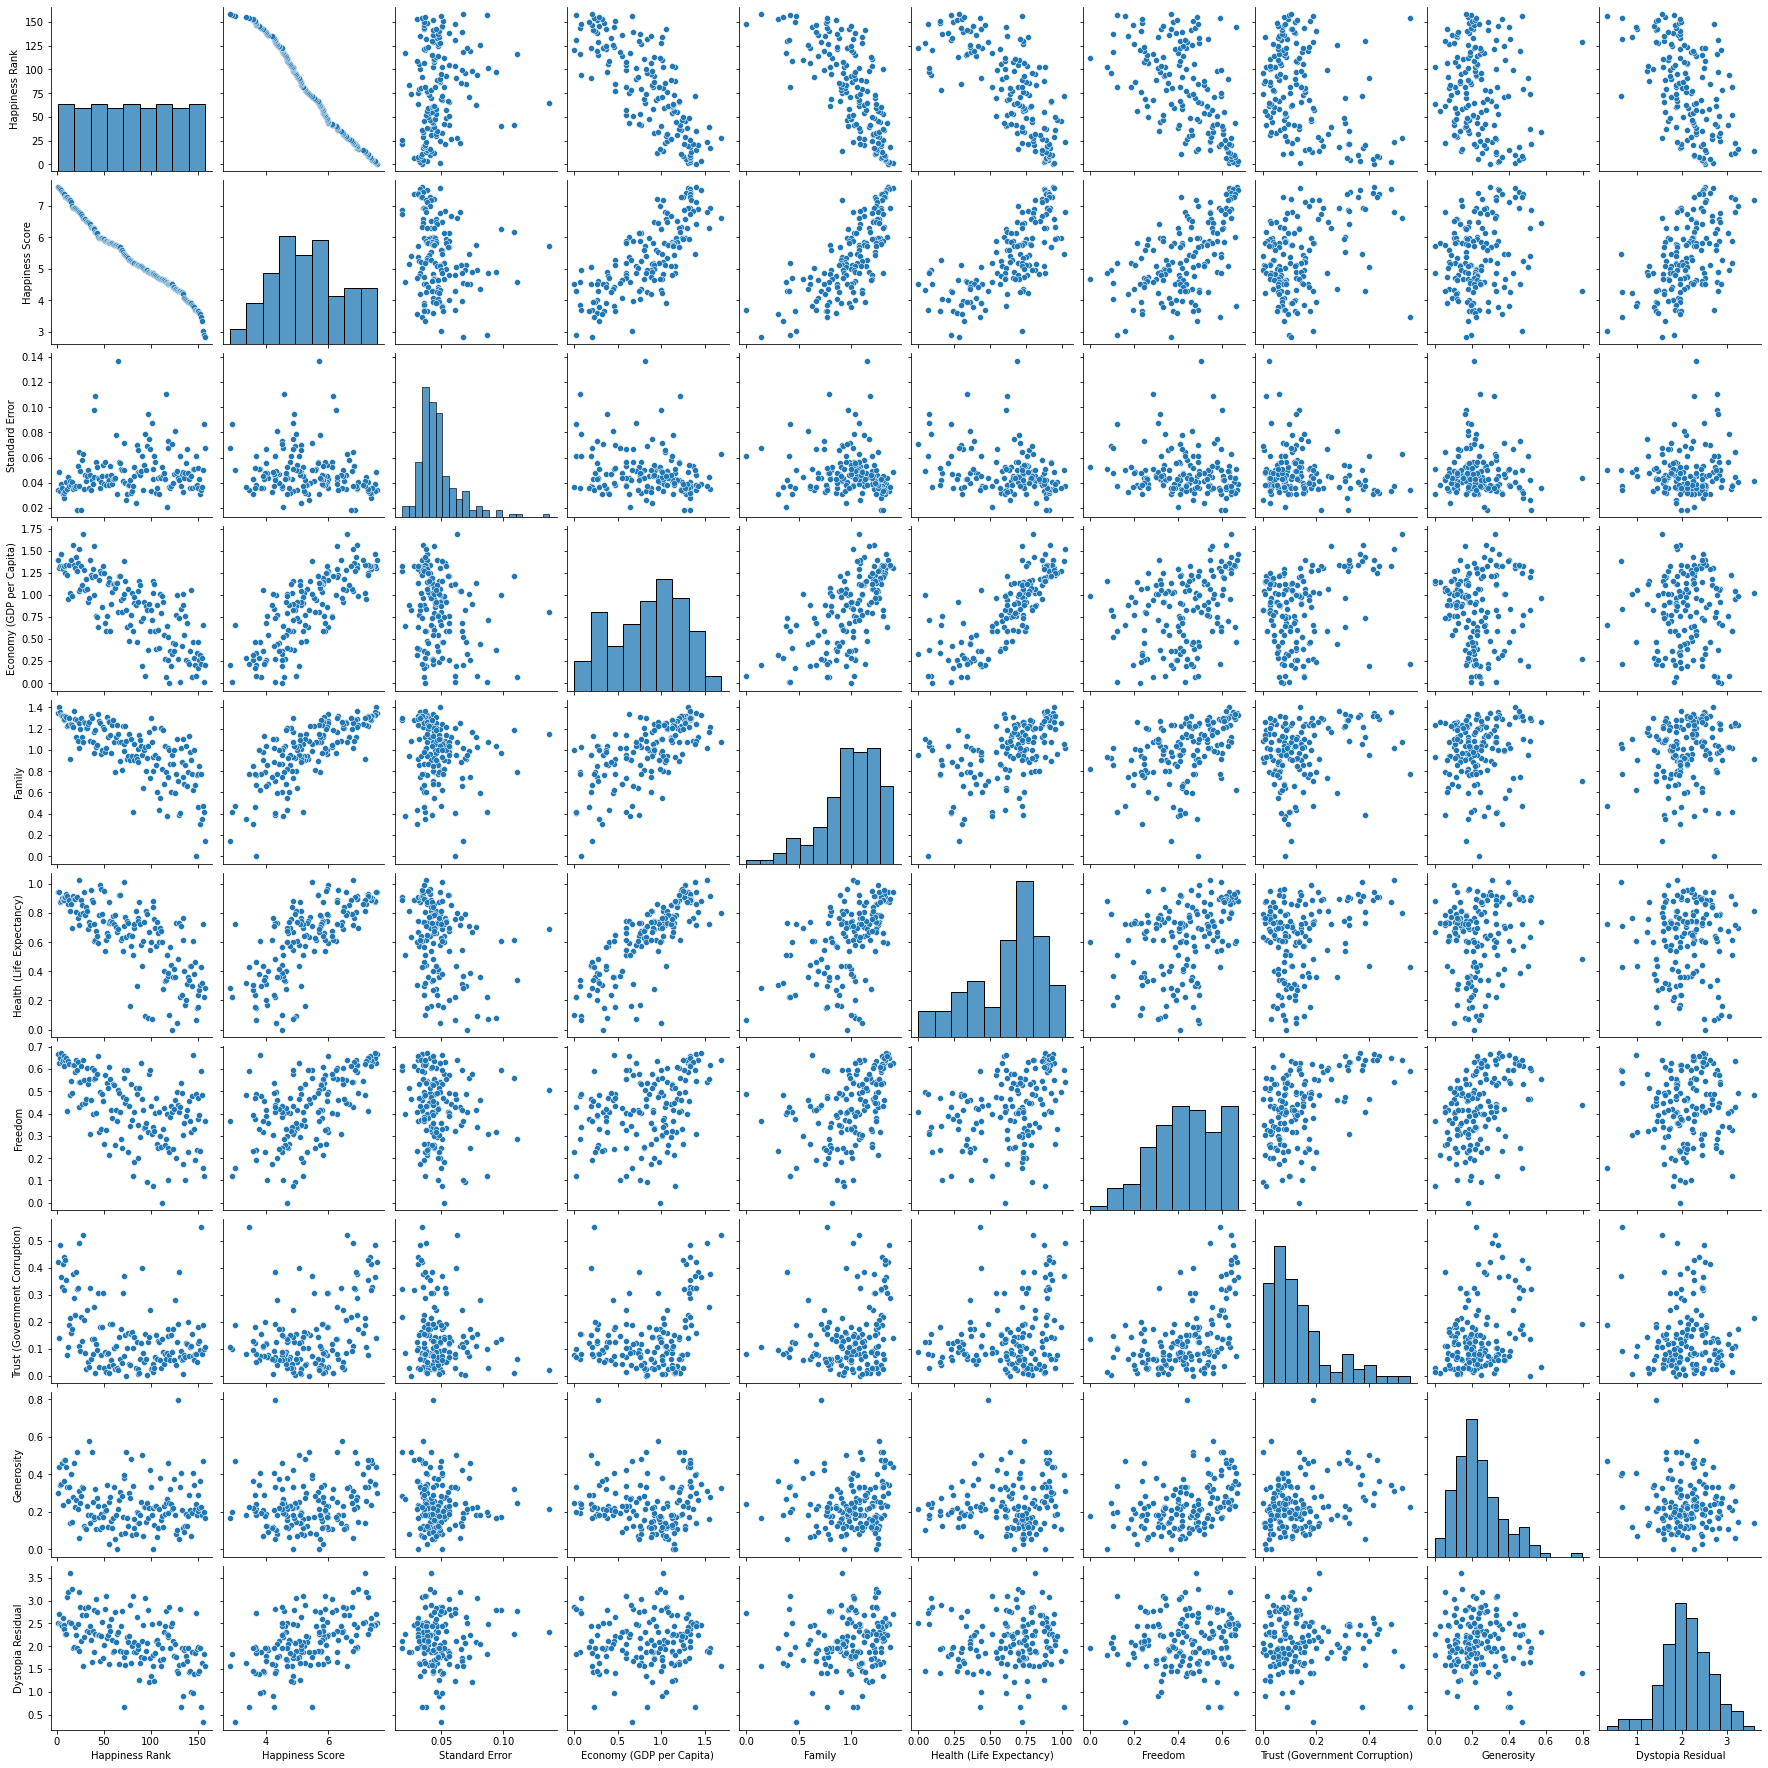

In [28]:
#multivariet analysis helps us to determine all the relations b/w all the rows & columns 
#here we can see in some scatterplots there are +ve relationship & -ve relationships as well
#different histograms are also there the best we can see i.e. in the last row last column the perfect bell shaped curve
#multivariet analysis helps us to determine so many insights from the data

sns.pairplot(df)

Happiness Rank                      AxesSubplot(0.125,0.536818;0.133621x0.343182)
Happiness Score                  AxesSubplot(0.285345,0.536818;0.133621x0.343182)
Standard Error                    AxesSubplot(0.44569,0.536818;0.133621x0.343182)
Economy (GDP per Capita)         AxesSubplot(0.606034,0.536818;0.133621x0.343182)
Family                           AxesSubplot(0.766379,0.536818;0.133621x0.343182)
Health (Life Expectancy)               AxesSubplot(0.125,0.125;0.133621x0.343182)
Freedom                             AxesSubplot(0.285345,0.125;0.133621x0.343182)
Trust (Government Corruption)        AxesSubplot(0.44569,0.125;0.133621x0.343182)
Generosity                          AxesSubplot(0.606034,0.125;0.133621x0.343182)
Dystopia Residual                   AxesSubplot(0.766379,0.125;0.133621x0.343182)
dtype: object

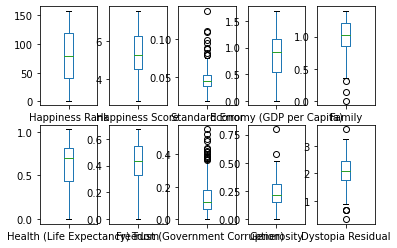

In [29]:
#boxplots are considered as the best plots for determining outliers
#here we can see in many of the columns there are outliers we will remove them afterwards

df.plot(kind='box',subplots=True,layout=(2,5))

<AxesSubplot:>

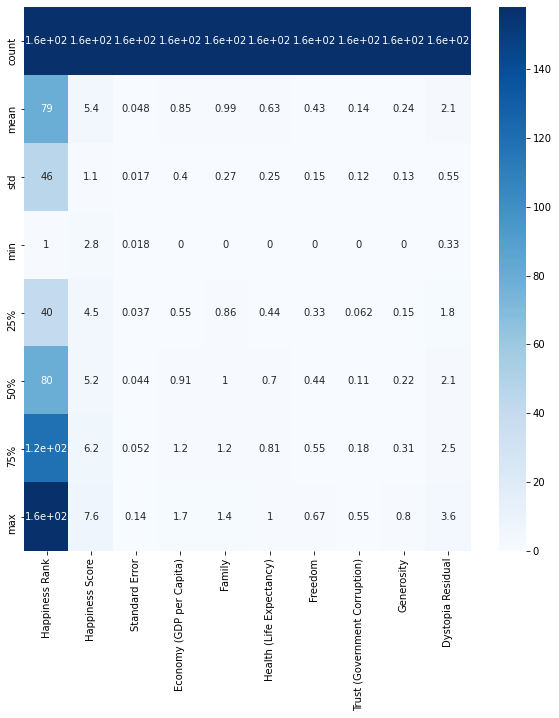

In [30]:
#plotting heatmap 

plt.figure(figsize=(10,10))
sns.heatmap(df.describe(),annot=True,cmap='Blues')

# DETERMINING CO-RELATIONS B/W THE COLUMNS

In [31]:
#determining co-relations of all the rows & columns

df.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


<AxesSubplot:>

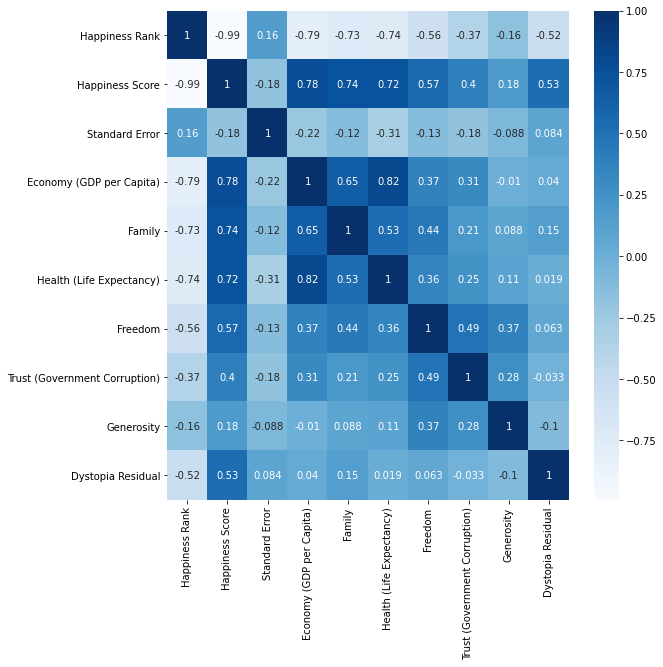

In [32]:
#plotting heatmap of co-related data
#we can clearly determine the differrent co-relations b/w the columns

plt.figure(figsize=(9,9))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

# DROPING THE COLUMNS WE DONT NEED

In [33]:
#with drop function droping the column country as we dont need it

df.drop('Country',axis=1,inplace=True)

In [34]:
#printing new dataframe without the cloumn country

df

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
153,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


# ENCODING THE REGION COLUMN

In [35]:
#importing the needed libarary for encoding the column Region

from sklearn.preprocessing import OneHotEncoder

In [36]:
#encoding the column with ONE HOT ENCODER

OHE=OneHotEncoder()
df['Region']=pd.get_dummies(df['Region'])
df

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,0,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,0,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,0,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,0,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
153,0,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,0,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,0,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,0,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [37]:
#checking out our encoding done 

df['Region']

0      0
1      0
2      0
3      0
4      0
      ..
153    0
154    0
155    0
156    0
157    0
Name: Region, Length: 158, dtype: uint8

# REMOVING OUTLIERS

In [38]:
#importing stats library from scipy to use zscore method


from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  8,   9,  27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64),
 array([ 0,  0,  8,  3,  3,  3,  9,  5,  8, 10,  5], dtype=int64))

In [39]:
#checking the values through the arrays of row & column we got above

z[64][3]

5.209813157066768

In [40]:
z[155][10]

3.2084304855119403

In [41]:
#printing z

z

array([[0.1132277 , 1.72099989, 1.93736005, ..., 2.30965159, 0.47103971,
        0.75825809],
       [0.1132277 , 1.69907456, 1.91458063, ..., 0.01647953, 1.57585637,
        1.09285682],
       [0.1132277 , 1.67714922, 1.88479215, ..., 2.8427738 , 0.8242928 ,
        0.71233526],
       ...,
       [0.1132277 , 1.67742676, 2.0761992 , ..., 0.38141902, 1.85689094,
        3.20843049],
       [0.1132277 , 1.69935209, 2.1646885 , ..., 0.35771452, 0.31694987,
        0.48198451],
       [0.1132277 , 1.72127743, 2.22251319, ..., 0.30180313, 0.5581534 ,
        0.96361241]])

In [42]:
# we can see above the values are greater than 3

In [43]:
#after cleaning the dataset printing the new dataset & storing it into df_new

df_new=df[(z<3).all(axis=1)]

In [44]:
#printing old dataset 

df

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,0,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,0,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,0,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,0,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
153,0,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,0,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,0,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,0,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [45]:
#printing the new dataset after cleaning the data(i.e. removing outliers & columns we dont need)

df_new

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,0,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,0,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,0,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,0,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
150,0,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,0,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,0,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,0,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


# % OF LOSS 

In [46]:
#6% of our data is lost while cleaning the dataset

loss=(158-147)/158*100
loss

6.962025316455696

# DIVIDING THE TRAINING & TESTING PHASE

In [47]:
#training phas is stored in the x variable

x = df_new.iloc[:,[0,1,3,4,5,6,7,8,9,10]]
x

,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,0,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,0,3,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,0,4,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,0,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
150,0,151,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,0,152,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,0,153,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,0,155,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [48]:
#storing target variable into the y for testing

y=df_new.iloc[:,2]
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
150    3.655
151    3.587
152    3.575
154    3.340
156    2.905
Name: Happiness Score, Length: 147, dtype: float64

In [49]:
#checking out shape of all the variables other than target variable

x.shape

(147, 10)

In [50]:
#printing the shape of our target variable

y.shape

(147,)

# LINEAR REGRESSION

In [51]:
#sending the data for training & testing with the help of train_test_split method

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)
lr=LinearRegression()

In [52]:
#importing different functions for checking our model

from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [53]:
#printing all the accuracy i.e. at what random state how much accuracy we are getting


for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i},the training accuracy is:- {r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {r2_score(y_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:- 0.9999999428461778
At random state 0,the testing accuracy is:- 0.9999998904229139


At random state 1,the training accuracy is:- 0.9999999412481018
At random state 1,the testing accuracy is:- 0.9999998911343162


At random state 2,the training accuracy is:- 0.9999999359130249
At random state 2,the testing accuracy is:- 0.9999999285877456


At random state 3,the training accuracy is:- 0.9999999320103913
At random state 3,the testing accuracy is:- 0.9999999455925337


At random state 4,the training accuracy is:- 0.9999999257001838
At random state 4,the testing accuracy is:- 0.9999999529747877


At random state 5,the training accuracy is:- 0.9999999414056077
At random state 5,the testing accuracy is:- 0.9999999095390273


At random state 6,the training accuracy is:- 0.9999999378336157
At random state 6,the testing accuracy is:- 0.9999999226169629


At random state 7,the training accuracy is:- 0.9999999413595411
At random state 7,the testing acc

At random state 71,the training accuracy is:- 0.9999999312150474
At random state 71,the testing accuracy is:- 0.999999944977399


At random state 72,the training accuracy is:- 0.9999999190488962
At random state 72,the testing accuracy is:- 0.999999970043499


At random state 73,the training accuracy is:- 0.999999930917909
At random state 73,the testing accuracy is:- 0.9999999474396754


At random state 74,the training accuracy is:- 0.9999999421824568
At random state 74,the testing accuracy is:- 0.9999999045772962


At random state 75,the training accuracy is:- 0.9999999386102605
At random state 75,the testing accuracy is:- 0.999999911685278


At random state 76,the training accuracy is:- 0.9999999355519067
At random state 76,the testing accuracy is:- 0.9999999284181457


At random state 77,the training accuracy is:- 0.9999999367117497
At random state 77,the testing accuracy is:- 0.9999999160248202


At random state 78,the training accuracy is:- 0.9999999468311519
At random state 78,the

In [54]:
#sending our model for training & testing

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [55]:
#making fit

lr.fit(x_train,y_train)

LinearRegression()

In [56]:
#predicting feature cloumns test

pred_test=lr.predict(x_test)

In [57]:
#printing accuracy with r2 score

print(r2_score(y_test,pred_test))

0.9999999331821455


# ELASTIC NET

In [58]:
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.0001)
#enr=ElasticNet
enr.fit(x_train,y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train,y_train))
enr.coef_

0.9999753565919217


array([ 0.        , -0.00099157, -0.        ,  0.96379227,  0.95751846,
        0.95307927,  0.95665626,  0.96974935,  0.96152479,  0.95947027])

# SUPPORT VECTOR MACHINE

In [59]:
from sklearn.svm import SVR


kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))

0.9955147478967808
0.743781673625734
0.988690034719328


# LASSO

In [60]:
from sklearn.linear_model import Lasso,Ridge

In [61]:
ls=Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.9999742932520095

# RIDGE

In [62]:
#try to minimize the coefficient variance

rd=Ridge(alpha=0.0001)
#rd=Ridge()
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.9999999306361768

# BEST MODEL IS LR (BCOZ IT IS GIVING THE BEST ACCURACY FOR OUR MODEL)

# HYPER PARAMETER TUNNING

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [64]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
ls=Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [65]:
ls = Lasso(alpha=0.0001,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)

lss = r2_score(y_test,pred_ls)
lss

0.9999828227127274

In [66]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.9978842055675277

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['mse', 'mae'],'max_features':["auto", "sqrt", "log2"]}
rf =RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [68]:
rf= RandomForestRegressor(criterion="mae",max_features="auto")
rf.fit(x_train, y_train)
rf.score(x_train, y_train)
pred_decision = rf.predict(x_test)

rfs = r2_score(y_test,pred_decision)
print('R2 Score:',rfs*100)

R2 Score: 99.68236718375331


# WE ARE GETTING MODEL ACCURACY AS 99.7% WHICH STATS THAT OUR MODEL IS PERFORMING EXTREMLY WELL

In [69]:
import pickle
filename = 'world_happy.pkl'
pickle.dump(rf, open(filename, 'wb'))

# CONCLUSION

In [70]:
loaded_model = pickle.load(open('world_happy.pkl', 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.9968236718375332


In [71]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=["Predicted","Orginal"])

In [72]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
Predicted,4.19644,5.837165,3.77598,6.84955,4.70453,6.95823,5.19245,6.31419,5.13021,7.31322,...,4.13145,3.91269,3.60976,5.98508,6.92484,7.22069,4.5131,5.07323,3.73205,5.75578
Orginal,4.19644,5.837165,3.77598,6.84955,4.70453,6.95823,5.19245,6.31419,5.13021,7.31322,...,4.13145,3.91269,3.60976,5.98508,6.92484,7.22069,4.5131,5.07323,3.73205,5.75578
